<h1>Catering Expenditure Predictor</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
df = pd.read_csv('dataset.csv')

In [7]:
df.head()

,No_of_pass,No_of_male_pass,No_of_female_pass,No_of_kids,No_of_non_veg_pass,Flight_duration,Day/Night_flight,No_of_business_class_pass,Catering_expenditure
0,104,56,34,14,41,12,1,12,2352.0
1,163,106,41,16,97,13,0,35,2652.0
2,231,92,109,30,57,4,1,52,2547.0
3,91,61,10,20,80,7,0,18,1313.0
4,324,88,123,113,176,9,1,42,5944.0


In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
No_of_pass,30.0,182.333333,70.240146,82.0,120.50,175.5,229.50,324.0
No_of_male_pass,30.0,83.300000,26.740322,43.0,59.25,85.5,105.75,125.0
No_of_female_pass,30.0,69.433333,31.801847,10.0,45.25,74.5,94.00,123.0
No_of_kids,30.0,29.666667,24.337191,3.0,12.50,21.5,41.50,113.0
No_of_non_veg_pass,30.0,96.300000,52.710105,24.0,57.00,82.5,129.00,205.0
Flight_duration,30.0,7.900000,3.536509,2.0,5.00,7.5,10.00,15.0
Day/Night_flight,30.0,0.533333,0.507416,0.0,0.00,1.0,1.00,1.0
No_of_business_class_pass,30.0,36.866667,16.245388,7.0,25.25,36.0,49.75,70.0
Catering_expenditure,30.0,3158.183333,1843.020462,1022.0,1753.50,2511.0,4364.00,7210.0


In [28]:
df.columns

Index(['No_of_pass', 'No_of_male_pass', 'No_of_female_pass', 'No_of_kids',
       'No_of_non_veg_pass', 'Flight_duration', 'Day/Night_flight',
       'No_of_business_class_pass', 'Catering_expenditure'],
      dtype='object')

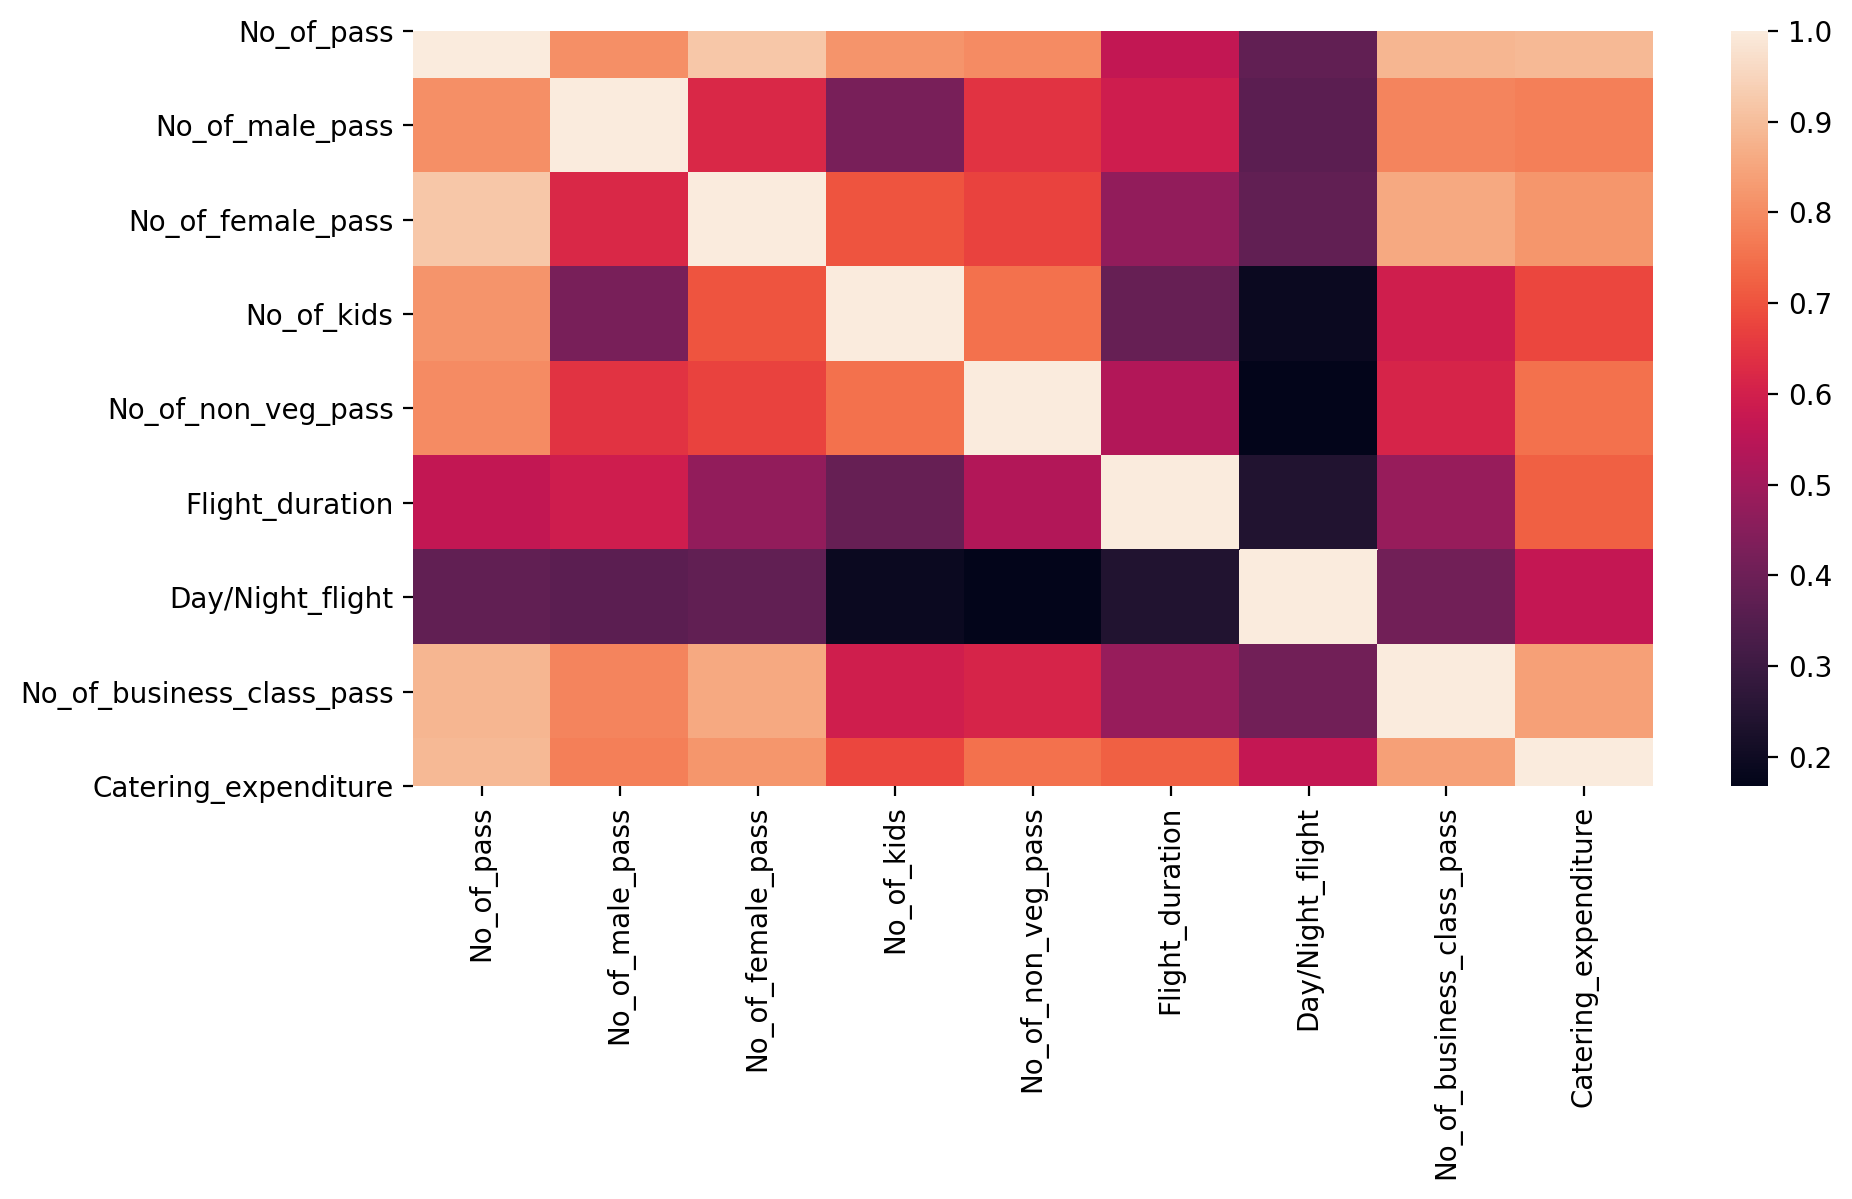

In [22]:
plt.figure(figsize=(10,5),dpi = 200)
sns.heatmap(df.corr() );

<Figure size 2000x1600 with 0 Axes>

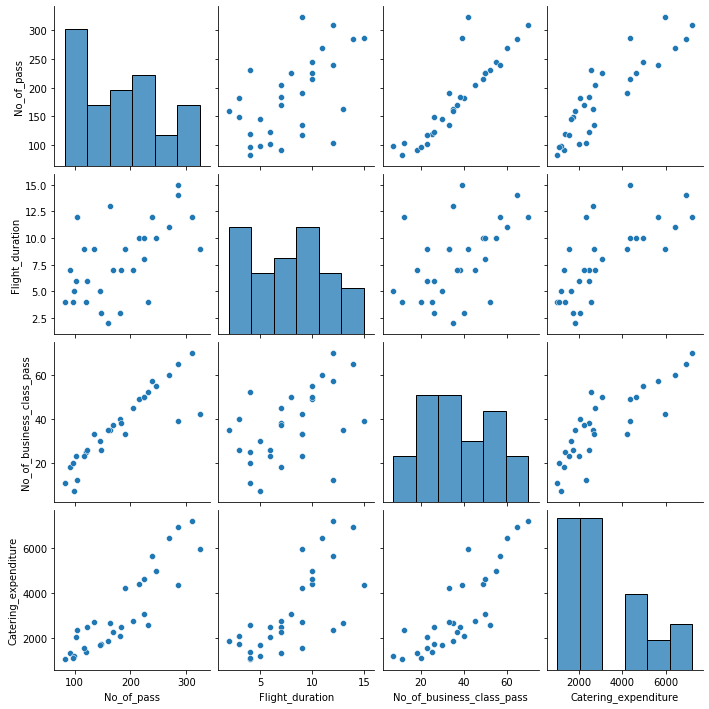

In [77]:
plt.figure(figsize=(10,8) , dpi =200)
sns.pairplot(data=df[['No_of_pass','Flight_duration','No_of_business_class_pass','Catering_expenditure' ]] );

In [34]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop('Catering_expenditure',axis = 1)

In [38]:
y = df['Catering_expenditure']

In [39]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=101)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scaler = StandardScaler()

In [46]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [47]:
scaled_X_train = scaler.transform(X_train)

In [49]:
scaled_X_test = scaler.transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
linear_model = LinearRegression()

In [53]:
linear_model.fit(scaled_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
linear_model.coef_

array([-5216.56687984,  2358.22763578,  2837.64689822,  2157.93687385,
         103.10581139,   365.75304869,   512.32978939,   258.41864887])

In [56]:
linear_pred = linear_model.predict(scaled_X_test)

In [57]:
linear_pred

array([2378.89481843, 2028.06953225,  420.52143314, 6219.57265931,
       4053.0425582 , 2524.91732766])

In [73]:
y_test

20    2470.5
24    2023.5
7     1022.0
18    6933.0
2     2547.0
27    2475.0
Name: Catering_expenditure, dtype: float64

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [60]:
mean_absolute_error(y_test,linear_pred)

494.5067512065987

In [63]:
np.sqrt(mean_squared_error(y_test,linear_pred))

724.5485207448968

In [231]:
p1 = scaler.transform([[210,95,85,30,110,4,0,55]])

In [232]:
p1

array([[ 0.35440882,  0.3935272 ,  0.48960418, -0.06772389,  0.15175611,
        -1.20842061, -1.        ,  1.16493965]])

In [233]:
linear_model.predict(p1)

array([2904.5559057])

In [267]:
from joblib import dump,load

In [268]:
dump(linear_model , 'linearmodel.joblib' )

['linearmodel.joblib']

In [269]:
dump(scaler,'linearscaler.joblib')

['linearscaler.joblib']

In [270]:
ls = load('linearscaler.joblib')

In [271]:
lm = load('linearmodel.joblib')

In [273]:
mpe = ls.transform([[210,95,85,30,110,13,1,55]])

In [276]:
lm.predict(mpe)[0]

4883.899893463961

In [275]:
df

,No_of_pass,No_of_male_pass,No_of_female_pass,No_of_kids,No_of_non_veg_pass,Flight_duration,Day/Night_flight,No_of_business_class_pass,Catering_expenditure
0,104,56,34,14,41,12,1,12,2352.0
1,163,106,41,16,97,13,0,35,2652.0
2,231,92,109,30,57,4,1,52,2547.0
3,91,61,10,20,80,7,0,18,1313.0
4,324,88,123,113,176,9,1,42,5944.0
5,148,119,16,6,55,3,1,26,1729.0
6,286,112,106,68,205,15,0,39,4343.0
7,82,53,26,3,66,4,0,11,1022.0
8,190,95,88,7,190,9,1,33,4206.0
9,99,62,27,10,77,5,0,7,1174.0


In [93]:
from sklearn.preprocessing import PolynomialFeatures

In [147]:
polynomial_converter = PolynomialFeatures(degree = 2)

In [148]:
polyfeatures = polynomial_converter.fit_transform(X)

In [149]:
polyfeatures

array([[1.000e+00, 1.040e+02, 5.600e+01, ..., 1.000e+00, 1.200e+01,
        1.440e+02],
       [1.000e+00, 1.630e+02, 1.060e+02, ..., 0.000e+00, 0.000e+00,
        1.225e+03],
       [1.000e+00, 2.310e+02, 9.200e+01, ..., 1.000e+00, 5.200e+01,
        2.704e+03],
       ...,
       [1.000e+00, 1.830e+02, 9.400e+01, ..., 0.000e+00, 0.000e+00,
        1.444e+03],
       [1.000e+00, 1.690e+02, 7.300e+01, ..., 0.000e+00, 0.000e+00,
        1.369e+03],
       [1.000e+00, 2.250e+02, 1.190e+02, ..., 1.000e+00, 5.000e+01,
        2.500e+03]])

In [150]:
 X_train, X_test, y_train, y_test = train_test_split(polyfeatures, y, test_size=0.3, random_state=101)

In [151]:
polynomialmodel = LinearRegression()

In [152]:
polynomialmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [153]:
polypred = polynomialmodel.predict(X_test)

In [154]:
mean_absolute_error(polypred,y_test)

412.80572314724384

In [155]:
np.sqrt(mean_squared_error(polypred,y_test))

665.1833195715512

In [238]:
p2 = polynomial_converter.transform([[210,95,85,30,110,13,1,55]])

In [239]:
polynomialmodel.predict(p2)

array([5466.62905482])

In [240]:
from sklearn.linear_model import ElasticNet

In [241]:
elasticmodel = ElasticNet()

In [244]:
param_grid = { 'alpha' :[0.001 , 0.1 , 0.01 , 1 , 5 , 100] ,
                'l1_ratio' : [0.1 , 0.2 , 0.5 , 0.7 , 0.9 , 1]}

In [242]:
from sklearn.model_selection import GridSearchCV

In [249]:
gridmodel = GridSearchCV(elasticmodel , param_grid=param_grid ,scoring='neg_mean_squared_error')

In [250]:
gridmodel.fit(X_train,y_train)

D:\CODING\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\CODING\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 707826.5113298575, tolerance: 5141.821225000001
  positive)
D:\CODING\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1108289.14642279, tolerance: 5863.15884375
  positive)
D:\CODING\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 624822.8432585705, tolerance: 4314.314725

D:\CODING\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 625486.6860329506, tolerance: 4314.314725
  positive)
D:\CODING\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 697226.9142358679, tolerance: 5141.821225000001
  positive)
D:\CODING\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1101154.5143733479, tolerance: 5863.15884375
  positive)
D:\CODING\Anaconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 619662.015743998, tolerance: 4314

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.001, 0.1, 0.01, 1, 5, 100],
                         'l1_ratio': [0.1, 0.2, 0.5, 0.7, 0.9, 1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [254]:
gp = gridmodel.predict(X_test)

In [255]:
mean_absolute_error(y_test,gp)

488.2012348629484

In [256]:
gridmodel.best_params_

{'alpha': 0.001, 'l1_ratio': 1}

In [257]:
np.sqrt(mean_squared_error(y_test,gp))

715.4542670690769

In [265]:
gridmodel.predict([[97,50,40,7,60,4,0,30]])

array([930.17954301])

In [156]:
from sklearn.svm import SVR

In [157]:
svmodel = SVR()

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [162]:
svmodel.fit(X_train,y_train)

D:\CODING\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [166]:
svpred = svmodel.predict(X_test)

In [169]:
mean_absolute_error(y_test,svpred)

1185.6666656426312

In [170]:
np.sqrt(mean_squared_error(y_test,svpred))

1887.337867956509

In [64]:
from sklearn.tree import DecisionTreeRegressor

decisiontree_model = DecisionTreeRegressor(max_depth = 3)

In [82]:
decisiontree_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [83]:
decisionpredict = decisiontree_model.predict(X_test)

In [84]:
y_test

20    2470.5
24    2023.5
7     1022.0
18    6933.0
2     2547.0
27    2475.0
Name: Catering_expenditure, dtype: float64

In [85]:
decisionpredict

array([1655. , 1084. , 1174. , 4954.5, 6433.5, 2259. ])

In [86]:
mean_absolute_error(y_test,decisionpredict)

1331.3333333333333

In [87]:
np.sqrt(mean_squared_error(y_test,decisionpredict))

1854.5801411640318

In [88]:
from sklearn.tree import plot_tree

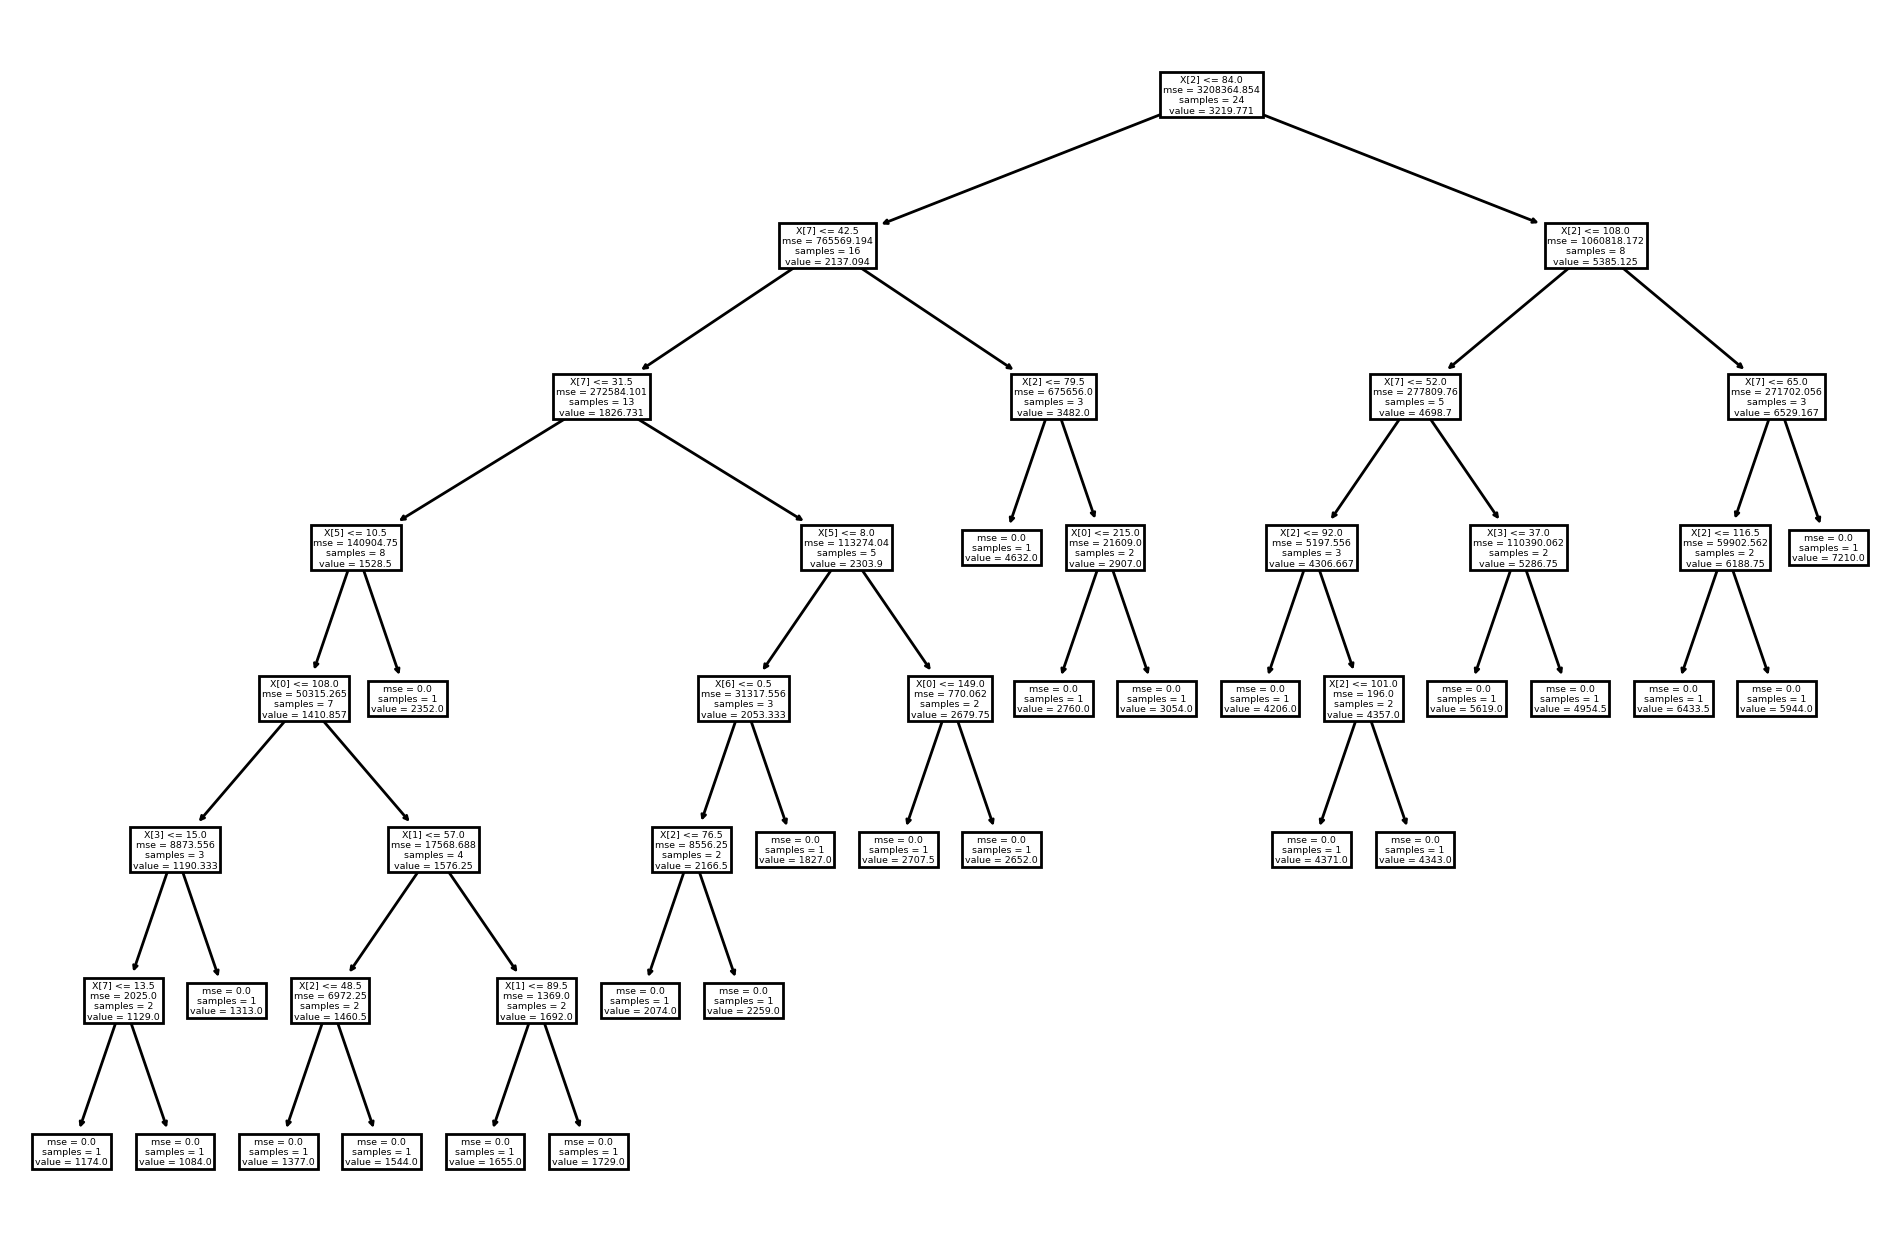

In [89]:
plt.figure(figsize=(12,8),dpi=200)
plot_tree(decisiontree_model);